In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import pearsonr

In [34]:
#reading data from excel file.
Exam_Score = pd.read_excel(r'Final Exam Scores.xlsx')
Exam_Score

,Unnamed: 0,Unnamed: 1
0,Student #,Final Exam Score
1,023,100
2,018,100
3,005,97
4,013,97
5,015,97
6,033,97
7,036,97
8,012,85
9,001,85


In [35]:
#Creat the dataframe ScoreDF for the Exam_Score data.
ScoreDF = pd.DataFrame(Exam_Score)
ScoreDF

,Unnamed: 0,Unnamed: 1
0,Student #,Final Exam Score
1,023,100
2,018,100
3,005,97
4,013,97
5,015,97
6,033,97
7,036,97
8,012,85
9,001,85


In [36]:
#Renaming the columns to appropriate names and droping the column the least useful column 

ScoreDF1 = ScoreDF.rename(columns={"Unnamed: 0": "Student#", "Unnamed: 1": "Final_Exam_Score"}).drop([0])
ScoreDF1

,Student#,Final_Exam_Score
1,023,100
2,018,100
3,005,97
4,013,97
5,015,97
6,033,97
7,036,97
8,012,85
9,001,85
10,035,83


In [37]:
#sorting the final exam score in descending order of the score.

ScoreDF2 = ScoreDF1.sort_values(by=['Final_Exam_Score'], ascending=False)
ScoreDF2

,Student#,Final_Exam_Score
1,023,100
2,018,100
3,005,97
4,013,97
5,015,97
6,033,97
7,036,97
8,012,85
9,001,85
10,035,83


In [38]:
#obtaining an overall description of the dataframe.

ScoreDF2.describe()

,Student#,Final_Exam_Score
count,39,39
unique,39,24
top,007,0
freq,1,7


In [ ]:
The above table shows the description of the data. Here the total number and unique number of students are 39. 
All the students have obtained a Final Exam score among which 24 are unique scores 
with top score (mode) being 0 for 7 students while the distribution of score varies for 
the other students as shown in the bar graph above.

In [39]:
#Average final exam scores for 39 students is: 

mean = ScoreDF2['Final_Exam_Score'].mean()
mean

50.41025641025641

In [40]:
#obtaining the median value of the final exam scores

median= ScoreDF2['Final_Exam_Score'].median()
median

65.0

In [49]:
#grouping the repeated scores to get a count of the number of students and their scores.

ScoreDF3 = ScoreDF2.groupby('Final_Exam_Score')['Student#'].count()
ScoreDF3

Final_Exam_Score
0      7
1      1
5      2
6      1
9      1
12     1
16     1
26     1
44     1
50     1
53     1
60     1
65     2
68     1
70     1
73     1
75     1
80     1
81     1
82     2
83     1
85     2
97     5
100    2
Name: Student#, dtype: int64

In [50]:
ScoreDF2["Student#"] = ScoreDF2["Student#"].astype(int) 
ScoreDF2["Final_Exam_Score"] = ScoreDF2["Final_Exam_Score"].astype(int) 

In [51]:
# Shapiro-Wilk Test
# Tests whether a data sample has a Gaussian distribution.

stat, p = shapiro(ScoreDF2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.868, p=0.000
Probably not Gaussian


In [52]:
#Pearson’s Correlation Coefficient
#tests whether two samples have a linear relationship
data1 = ScoreDF2["Student#"]
data2 = ScoreDF2["Final_Exam_Score"]

stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=-0.125, p=0.447
Probably independent


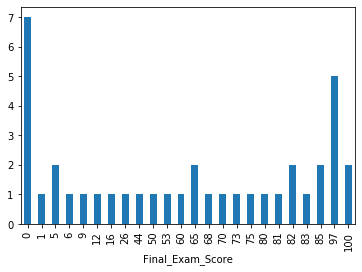

In [53]:
#ploting a bar graph of final exam score on x-axis and total number of students who scored the value on y-axis
ScoreDF3.plot(kind='bar')

In [ ]:
The above plot shows a plot of Final exam score against the number of students who scored these values.
From the above graph we can conclude that:
Number of students who scored 0 on the test are 7. This accounts for the highest number of group of students with least exam score.
Second highest group of students fall under the group who scored 97 who are 5 students.
But it can also be seen that a total of 17 students have different scored scores: 1,6,9,12,16,26,44,50,53,60,68,70,73,80,81 and 83.
This total accounts for half more than total number of students. And it can be concluded that the class average lies in this score range.